In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from os import listdir, path
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import mplfinance as fplt
import parallel
import threading

C:\Users\Mcian\Downloads\day_trader_bot\parallel.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plt.style.use('ggplot')

In [3]:
PATH = './dukascopy'

In [4]:
def make_data_and_plots(file):
    splt = file.split('.')
    symbol = splt[0]
    print(symbol)
    df = pd.read_csv(f'{PATH}/{file}')
    df = df[df['Volume'] > 0]
    peaks, peak_prop = find_peaks(df['Close'], width=1, prominence=(0.02, None))
    valleys, valley_prop = find_peaks(df['Close']*(-1), width=2.5, prominence=(0.05, None), plateau_size=(0,1))
    df['label'] = ['Sell' if idx in peaks and df.iloc[idx]['Local time'].split(' ')[1] >= '07:15:00' and df.iloc[idx]['Local time'].split(' ')[1] <= '13:00:00' else 'Buy' if idx in valleys and df.iloc[idx]['Local time'].split(' ')[1] >= '07:15:00' and df.iloc[idx]['Local time'].split(' ')[1] <= '12:00:00' else 'Hold' for idx in range(len(df))]
    df['Local time'] = pd.to_datetime(df['Local time'])
    df = df.set_index('Local time')
    df.to_csv(f'{PATH}/stock_data/{symbol}.csv')
    
    dates = [idx.isoformat().replace(':', '-') for idx in df.index]
    for i in range(len(df)):
        if i-44 >= 0:
            date = df.iloc[i:i+1].index[0].isoformat().replace(':', '-')
            image_file = f'{PATH}/stock_graphs/all/{symbol}_{dates[i]}'
            if path.exists(image_file):
                continue
            mc = fplt.make_marketcolors(
                up='tab:blue',down='tab:red',
                edge='black',
                wick={'up':'blue','down':'red'},
                volume='green', alpha=1.0
            )
            s  = fplt.make_mpf_style(marketcolors=mc, mavcolors=["yellow","orange",'brown'])

            fig = fplt.plot(
                df.iloc[i-44:i+1],
                type='candle',
                style=s,
                volume=True,
                axisoff=True,
                mav=(5,8,13),
                figsize=(3.2,3.2),
                xlim=(12.5, 44.5),
                savefig=image_file,
                tight_layout=True
            )

In [4]:
files = [f for f in listdir(PATH) if f.endswith('.csv')]

In [5]:
files

['AAPL.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'BAC.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'CVS.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'DIS.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'DLTR.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'DUK.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'DVA.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'EA.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'EXPE.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'FB.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'MCD.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv',
 'PYPL.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv',
 'SCHW.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv',
 'SNAP.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv',
 'TSLA.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv',
 'TSN.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv',
 'TWTR.USUSD_Candlestick_1_M_BID_01

AAPLBAC

CVS
DIS
DLTR
DUK
DVA
EA
EXPE
FB
MCD


Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-82e82f50123e>", line 39, in make_data_and_plots
    tight_layout=True
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\mplfinance\plotting.py", line 708, in plot
    plt.savefig(save,bbox_inches='tight')
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py", line 859, in savefig
    res = fig.savefig(*args, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py", line 2311, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-

Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-82e82f50123e>", line 39, in make_data_and_plots
    tight_layout=True
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\mplfinance\plotting.py", line 708, in plot
    plt.savefig(save,bbox_inches='tight')
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py", line 859, in savefig
    res = fig.savefig(*args, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py", line 2311, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-

Exception in thread Thread-13:
Traceback (most recent call last):
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-82e82f50123e>", line 39, in make_data_and_plots
    tight_layout=True
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\mplfinance\plotting.py", line 708, in plot
    plt.savefig(save,bbox_inches='tight')
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py", line 859, in savefig
    res = fig.savefig(*args, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py", line 2311, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site

Exception in thread Thread-10:
Traceback (most recent call last):
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-82e82f50123e>", line 39, in make_data_and_plots
    tight_layout=True
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\mplfinance\plotting.py", line 708, in plot
    plt.savefig(save,bbox_inches='tight')
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py", line 859, in savefig
    res = fig.savefig(*args, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py", line 2311, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "c:\users\mcian\appdata\local\programs\python\python37\lib\site

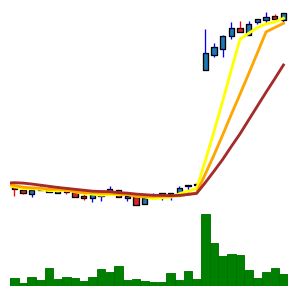

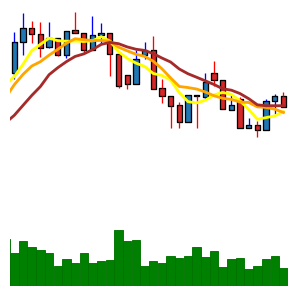

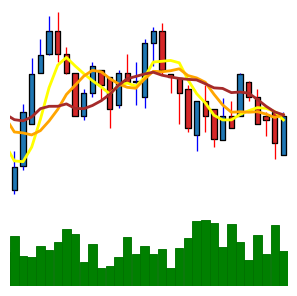

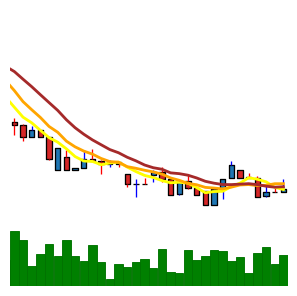

Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000023BABD12848>

<Figure size 320x320 with 4 Axes>

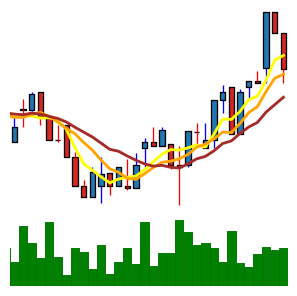

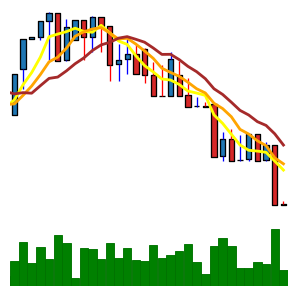

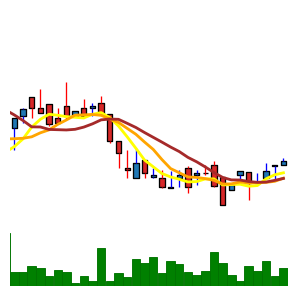

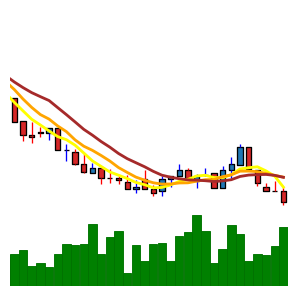

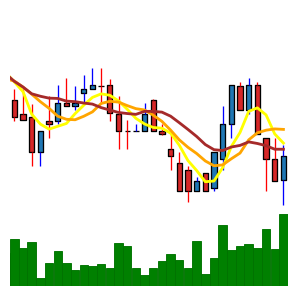

In [9]:
#create a list of threads
threads = []
for ii in range(len(files)):
    process = threading.Thread(target=make_data_and_plots, args=[files[ii]])
    process.start()
    threads.append(process)
    
for process in threads:
    process.join()

In [8]:
file

'AAPL.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv'

In [15]:
file = 'AAPL.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv'
df = pd.read_csv(f'{PATH}/{file}')
df = df[df['Volume'] > 0.01]
df['Local time'] = pd.to_datetime(df['Local time'])

In [345]:
dfs = {}
for file in files:
    df = pd.read_csv(f'{PATH}/{file}')
    df = df[df['Volume'] > 0]
    df['Local time'] = pd.to_datetime(df['Local time'])
    dfs[file] = df

In [356]:
size = 0
for file in files:
    size += dfs[file].shape[0]
size

277853

In [369]:
widths = [None,1,2.5]
prominences = [None] + [(p, None) for p in [0.02, 0.05, 0.2, 0.4, 0.6, 1]]
values = {'peak'  : {'width': widths, 'prominence': prominences}, 
          'valley': {'width': widths, 'prominence': prominences}}
vv = 1
for v in values.values():
    for v2 in v.values():
        vv *= len(v2)
vv*len(files)

10584

In [370]:
%%time
peak_valley_dist = 32
grid_search = []
for peak_width in values['peak']['width']:
    for peak_prominence in values['peak']['prominence']:
        for valley_width in values['valley']['width']:
            for valley_prominence in values['valley']['prominence']:
                profits_p = []
                profits = []
                for file in files:
                    peaks, peak_prop = find_peaks(dfs[file]['Close'], width=peak_width, prominence=peak_prominence)
                    valleys, valley_prop = find_peaks(dfs[file]['Close']*(-1), width=valley_width, prominence=valley_prominence)

                    j = 0
                    for i in range(len(peaks)):
                        if j == len(valleys):
                            break
                        if valleys[j] >= peaks[i]:
                            continue
                        while j+1 < len(valleys) and valleys[j+1] < peaks[i]:
                            j += 1

                        if peaks[i] - valleys[j] < peak_valley_dist:
                            if dfs[file].iloc[peaks[i]]['Local time'].day == dfs[file].iloc[valleys[j]]['Local time'].day:
                                bought = dfs[file].iloc[valleys[j]]['Close']
                                sold = dfs[file].iloc[peaks[i]]['Close']
                                profits_p.append((sold - bought) / bought)
                                profits.append((sold - bought))
                            
                        j += 1
                if len(profits) > 0:
                    grid_search.append([sum(profits), sum(profits_p)/len(profits_p), len(profits), peak_width, 
                                        peak_prominence, valley_width, valley_prominence])

Wall time: 30min 12s


In [371]:
pd.set_option('display.max_rows', 1000)
columns = ['profits', 'profits%', '#_bought', 'peak_width', 'peak_prominence', 'valley_width', 'valley_prominence']

grid_search_df = pd.DataFrame(grid_search, columns=columns)
grid_search_df['pp%'] = grid_search_df['profits'] * grid_search_df['profits%']
grid_search_df.sort_values('pp%', ascending=False, inplace=True)
grid_search_df

,profits,profits%,#_bought,peak_width,peak_prominence,valley_width,valley_prominence,pp%
88,7144.95700,0.005657,5460,NaN,"(0.4, None)",NaN,"(0.4, None)",40.421834
66,9774.95700,0.004050,12623,NaN,"(0.2, None)",NaN,"(0.2, None)",39.586820
242,6310.53500,0.005970,4826,1.0,"(0.4, None)",1.0,"(0.4, None)",37.674862
95,6445.13400,0.005834,5031,NaN,"(0.4, None)",1.0,"(0.4, None)",37.598471
235,6370.94000,0.005822,5012,1.0,"(0.4, None)",NaN,"(0.4, None)",37.093303
110,5567.66800,0.006617,3053,NaN,"(0.6, None)",NaN,"(0.6, None)",36.839695
73,8541.38000,0.004154,11322,NaN,"(0.2, None)",1.0,"(0.2, None)",35.483715
220,8312.78300,0.004263,10710,1.0,"(0.2, None)",1.0,"(0.2, None)",35.435613
213,8512.58500,0.004139,11327,1.0,"(0.2, None)",NaN,"(0.2, None)",35.234590
89,5543.20900,0.006292,3379,NaN,"(0.4, None)",NaN,"(0.6, None)",34.876507


In [368]:
pd.set_option('display.max_rows', 1000)
columns = ['profits', 'profits%', '#_bought', 'peak_width', 'peak_prominence', 'valley_width', 'valley_prominence']

grid_search_df = pd.DataFrame(grid_search, columns=columns)
grid_search_df['pp%'] = grid_search_df['profits'] * grid_search_df['profits%']
grid_search_df.sort_values('pp%', ascending=False, inplace=True)
grid_search_df

,profits,profits%,#_bought,peak_width,peak_prominence,valley_width,valley_prominence,pp%
75,6290.39500,0.006196,4038,NaN,"(0.5, None)",NaN,"(0.5, None)",38.973581
81,5698.35700,0.006385,3726,NaN,"(0.5, None)",1.0,"(0.5, None)",36.386400
225,5570.77200,0.006525,3580,1.0,"(0.5, None)",1.0,"(0.5, None)",36.351002
219,5614.00100,0.006348,3717,1.0,"(0.5, None)",NaN,"(0.5, None)",35.636445
231,4269.74300,0.007041,2708,1.0,"(0.5, None)",2.5,"(0.5, None)",30.062551
100,3794.52400,0.007835,1327,NaN,"(1, None)",NaN,"(1, None)",29.730428
375,3939.35200,0.007418,2364,2.5,"(0.5, None)",2.5,"(0.5, None)",29.223231
369,4108.86000,0.006940,2740,2.5,"(0.5, None)",1.0,"(0.5, None)",28.515489
106,3529.88500,0.007986,1250,NaN,"(1, None)",1.0,"(1, None)",28.189610
50,12656.19150,0.002212,35657,NaN,"(0.05, None)",NaN,"(0.05, None)",27.989845


In [358]:
67940/size

0.24451778458393467

In [278]:
top_values

{'profits': 3916.4420000000064,
 'profits%': 0.008234949474586688,
 '#_bought': 1335,
 'peak_width': nan,
 'peak_prominence': (1, None),
 'valley_width': nan,
 'valley_prominence': (1, None),
 'pp%': 32.251701990149286}

In [290]:
top_values = grid_search_df.iloc[0].to_dict()
for width in ['peak_width', 'valley_width']:
    top_values[width] = top_values[width] if type(top_values[width]) == float else None
for file in files:
    peaks, peak_prop = find_peaks(dfs[file]['Close'], width=top_values['peak_width'],
                                  prominence=top_values['peak_prominence'])
    valleys, valley_prop = find_peaks(dfs[file]['Close']*(-1), width=top_values['valley_width'], 
                                      prominence=top_values['valley_prominence'])
    print(file)
    print(len(valleys), len(peaks))
    print()

AAPL.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
69 70

BAC.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
4 7

CVS.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
18 17

DIS.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
113 112

DLTR.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
43 41

DUK.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
22 22

DVA.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
70 63

EA.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
83 82

EXPE.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
173 170

FB.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
231 228

MCD.USUSD_Candlestick_1_M_BID_01.01.2021-26.02.2021.csv
79 77

PYPL.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv
197 196

SCHW.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv
9 11

SNAP.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv
40 42

TSLA.USUSD_Candlestick_1_M_BID_01.02.2021-27.02.2021.csv
686 687

TSN.USUSD_Candlestick_1_M_BID_01.02.2021-27

In [339]:
for file in files:
    splt = file.split('.')
    symbol = splt[0]
    print(symbol)
    df = pd.read_csv(f'{PATH}/{file}')
    df = df[df['Volume'] > 0]
    peaks, peak_prop = find_peaks(df['Close'], width=top_values['peak_width'], prominence=top_values['peak_prominence'])
    valleys, valley_prop = find_peaks(df['Close']*(-1), width=top_values['valley_width'], 
                                      prominence=top_values['valley_prominence'])
    df['label'] = ['Sell' if idx in peaks else 'Buy' if idx in valleys else 'Hold' for idx in range(len(df))]
    df['Local time'] = pd.to_datetime(df['Local time'])
    df = df.set_index('Local time')
    df.to_csv(f'{PATH}/stock_data/{symbol}.csv')

AAPL
BAC
CVS
DIS
DLTR
DUK
DVA
EA
EXPE
FB
MCD
PYPL
SCHW
SNAP
TSLA
TSN
TWTR
USDMXN_Candlestick_1_M_BID_01
USO
VOW3
VZ
WMT
WYNN
XOM


In [346]:
file = files[3]
df = dfs[file]
peaks, peak_prop = find_peaks(df['Close'], width=top_values['peak_width'], prominence=top_values['peak_prominence'])
valleys, valley_prop = find_peaks(df['Close']*(-1), width=top_values['valley_width'], 
                                  prominence=top_values['valley_prominence'])

In [348]:
df['Bought'] = [close if idx in valleys else None for idx, close in enumerate(df['Close'])]
df['Sold'] = [close if idx in peaks else None for idx, close in enumerate(df['Close'])]
df[(~df['Bought'].isna()) | (~df['Sold'].isna())].iloc[:300]

,Local time,Open,High,Low,Close,Volume,Bought,Sold
4810,2021-04-01 08:10:00+08:00,175.127,175.128,174.707,174.838,1087.508300,174.838,NaN
4820,2021-04-01 08:20:00+08:00,176.378,176.678,176.248,176.517,797.506800,NaN,176.517
4875,2021-04-01 09:15:00+08:00,175.227,175.278,175.007,175.188,1277.513500,175.188,NaN
4973,2021-04-01 10:53:00+08:00,177.908,177.998,177.897,177.998,330.004500,NaN,177.998
5054,2021-04-01 12:14:00+08:00,176.577,176.688,176.347,176.367,767.505200,176.367,NaN
6183,2021-05-01 07:03:00+08:00,179.847,180.057,179.747,180.017,662.504500,NaN,180.017
6315,2021-05-01 09:15:00+08:00,178.008,178.037,177.887,177.947,455.002300,177.947,NaN
6429,2021-05-01 11:09:00+08:00,179.307,179.308,179.237,179.257,280.002300,NaN,179.257
7600,2021-06-01 06:40:00+08:00,177.967,177.967,177.467,177.508,795.004500,177.508,NaN
7608,2021-06-01 06:48:00+08:00,179.178,179.998,179.178,179.958,1105.014300,NaN,179.958


In [324]:
df.iloc[i-diff:i+diff].iloc[-1]['Local time']

Timestamp('2021-04-01 08:25:00+0800', tz='pytz.FixedOffset(480)')

In [328]:
df.index = df['Local time']

In [ ]:
import mplfinance as fplt
diff = 32
# df['Local time'] = pd.to_datetime(df['Local time'])
for i in valleys:
    if i > diff:
        ax = df.iloc[i-diff:i+diff].set_index('Local time').reset_index().plot(kind='scatter', x='Local time', y='Bought', 
                                                                               marker='x', color='brown', s=100)
        ax = df.iloc[i-diff:i+diff].set_index('Local time').reset_index().plot(kind='scatter', x='Local time', y='Sold', 
                                                                               marker='o', color='orange', s=100, ax=ax)
        ax = df.iloc[i-diff:i+diff].set_index('Local time').reset_index().plot(kind='line', x='Local time', y='Close', ax=ax)
#         mc = fplt.make_marketcolors(
#             up='tab:blue',down='tab:red',
#             edge='black',
#             wick={'up':'blue','down':'red'},
#             volume='green', alpha=1.0
#         )
#         s  = fplt.make_mpf_style(marketcolors=mc, mavcolors=["yellow","orange",'brown'])

#         fig = fplt.plot(
#             df.iloc[i-diff:i+diff].set_index('Local time'),
#             type='candle',
#             style=s,
#     #         volume=True,
#             axisoff=True,
#     #         figsize=(3.2,3.2),
#             tight_layout=True,
#             ax=ax
#         )

In [326]:
fig[0]

TypeError: 'NoneType' object is not subscriptable

In [6]:
file = files[0]
splt = file.split('.')
symbol = splt[0]
print(symbol)
df = pd.read_csv(f'{PATH}/{file}')
df = df[df['Volume'] > 0]
peaks, peak_prop = find_peaks(df['Close'], width=1, prominence=(0.02, None))
valleys, valley_prop = find_peaks(df['Close']*(-1), width=2.5, prominence=(0.05, None), plateau_size=(0,1))
df['label'] = ['Sell' if idx in peaks and df.iloc[idx]['Local time'].split(' ')[1] >= '07:15:00' and df.iloc[idx]['Local time'].split(' ')[1] <= '13:00:00' else 'Buy' if idx in valleys and df.iloc[idx]['Local time'].split(' ')[1] >= '07:15:00' and df.iloc[idx]['Local time'].split(' ')[1] <= '12:00:00' else 'Hold' for idx in range(len(df))]
df['Local time'] = pd.to_datetime(df['Local time'])
df = df.set_index('Local time')
# df.to_csv(f'{path}/stock_data/{symbol}.csv')

dates = [idx.isoformat().replace(':', '-') for idx in df.index]

AAPL


In [7]:
i = 100
if i-44 >= 0:
    date = df.iloc[i:i+1].index[0].isoformat().replace(':', '-')
    image_file = f'{path}/stock_graphs/all/{symbol}_{dates[i]}'
    mc = fplt.make_marketcolors(
        up='tab:blue',down='tab:red',
        edge='black',
        wick={'up':'blue','down':'red'},
        volume='green', alpha=1.0
    )
    s  = fplt.make_mpf_style(marketcolors=mc, mavcolors=["yellow","orange",'brown'])

    fig = fplt.plot(
        df.iloc[i-44:i+1],
        type='candle',
        style=s,
        volume=True,
        axisoff=True,
        mav=(5,8,13),
        figsize=(3.2,3.2),
        xlim=(12.5, 44.5),
        returnfig=True,
        savefig='test300.jpeg',
#         tight_layout=True
    )

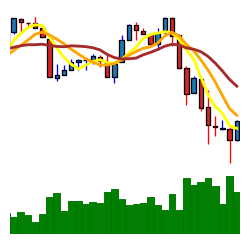

In [8]:
fig[0]

In [9]:
fig[1][0]

In [18]:
df.head()

,Open,High,Low,Close,Volume,label
Local time,,,,,,
2021-04-01 06:31:00+08:00,133.117,133.418,133.067,133.308,6.3128,Hold
2021-04-01 06:32:00+08:00,133.318,133.318,132.977,133.087,5.9912,Hold
2021-04-01 06:33:00+08:00,133.117,133.117,132.697,132.727,7.0721,Hold
2021-04-01 06:34:00+08:00,132.738,132.797,132.387,132.788,6.4318,Hold
2021-04-01 06:35:00+08:00,132.798,132.867,132.597,132.607,6.9725,Hold


In [15]:
df.reset_index().iloc[i-44:i+1].plot(kind='scatter', x='Local time', y='Close', marker='x', s=20, ax=fig[0].subplots())

<AxesSubplot:xlabel='Local time', ylabel='Close'>

In [17]:
plt.show()

In [37]:
fig[1][3].plot([0,1,2,3], [11,22,33,44])[0]

In [10]:
from PIL import Image

image = Image.open('./dukascopy/stock_graphs/all/AAPL_2021-01-02T06-30-00+08-00.png')

In [16]:
image.resize((32,32))
image.resize((256,256)).save('test.png', format="PNG", quality=85, progressive=True)